# 🧠 Predicción de riesgo de trastornos de salud mental


Este proyecto tiene como objetivo predecir si una persona podría requerir tratamiento de salud mental,
basándose en factores sociales y laborales, utilizando un dataset de encuestas en la industria tecnológica.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


## 📥 Carga del dataset

In [ ]:

# Subir archivo desde tu computadora
from google.colab import files
uploaded = files.upload()

# Cargar datos
df = pd.read_csv("survey.csv")


Saving survey.csv to survey (1).csv


## 🧽 Limpieza y preprocesamiento

In [ ]:

# Revisar columnas y valores nulos
df.info()
df.isnull().sum()

# Tratar valores nulos
df = df.dropna()

# Cambiar formato de cadenas de caracteres
df['Gender'] = df['Gender'].str.lower().str.strip()

# Crear grupos
df['Gender'] = df['Gender'].replace({
    'male': 'Male', 'm': 'Male', 'man': 'Male', 'cis male': 'Male',
    'female': 'Female', 'f': 'Female', 'woman': 'Female', 'cis female': 'Female',
    'trans female': 'Transgender', 'trans male': 'Transgender',
    'genderqueer': 'Other', 'non-binary': 'Other', 'agender': 'Other',
})

# Consolidar: Male, Female, Transgender, Other
df['Gender'] = df['Gender'].apply(lambda x: x.title() if x in ['Male', 'Female', 'Transgender', 'Other'] else 'Other')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

/tmp/ipython-input-11-2064580457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].str.lower().str.strip()
/tmp/ipython-input-11-2064580457.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace({
/tmp/ipython-input-11-2064580457.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

## 📊 Análisis exploratorio

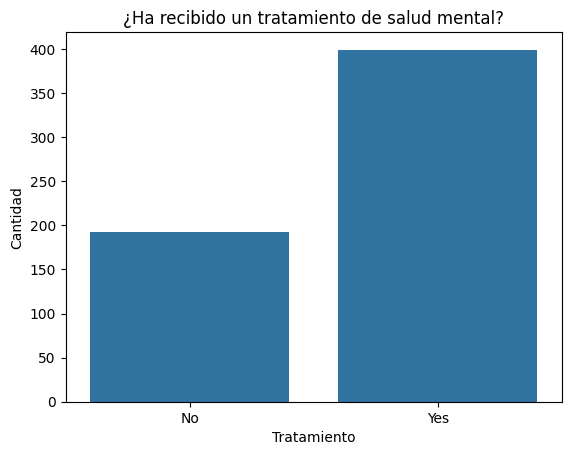

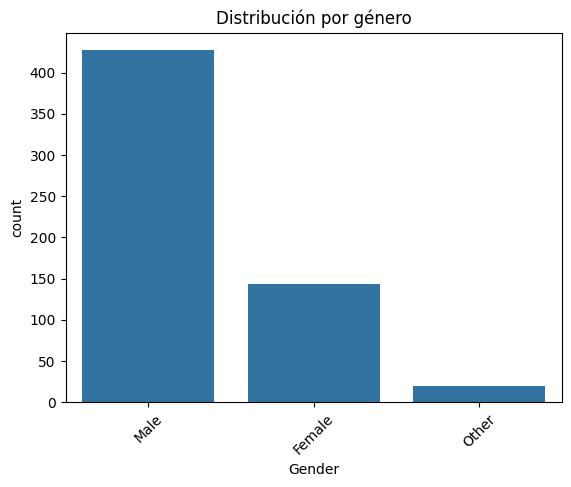

In [26]:
# Distriución de la variale ojetivo
sns.countplot(data=df, x='treatment')
plt.title("¿Ha recibido un tratamiento de salud mental?")
plt.xlabel('Tratamiento')
plt.ylabel('Cantidad')
plt.show()

# Distribución de género
sns.countplot(data=df, x='Gender')
plt.title("Distribución por género")
plt.xticks(rotation=45)
plt.show()

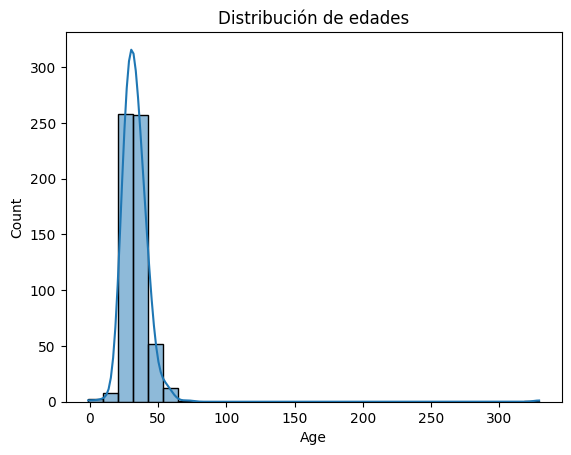

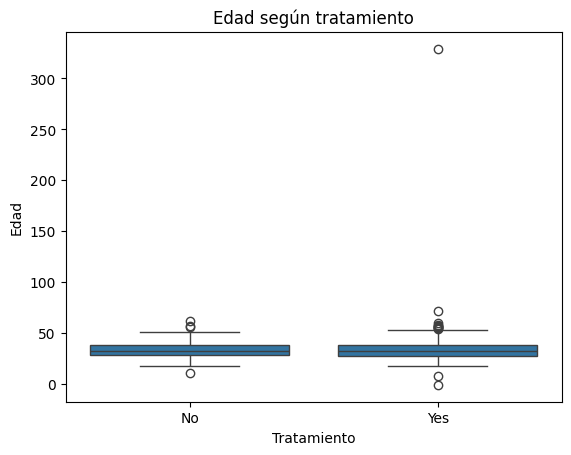

In [27]:
# Distribución de edades
sns.histplot(data=df,x='Age',kde=True,bins=30)
plt.title("Distribución de edades")
plt.show()

# Relación entre edad y tratamiento
sns.boxplot(data=df, x='treatment', y='Age')
plt.title("Edad según tratamiento")
plt.xlabel("Tratamiento")
plt.ylabel("Edad")
plt.show()

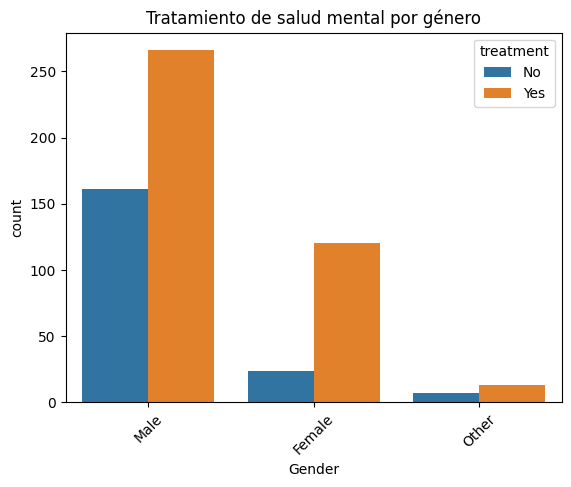

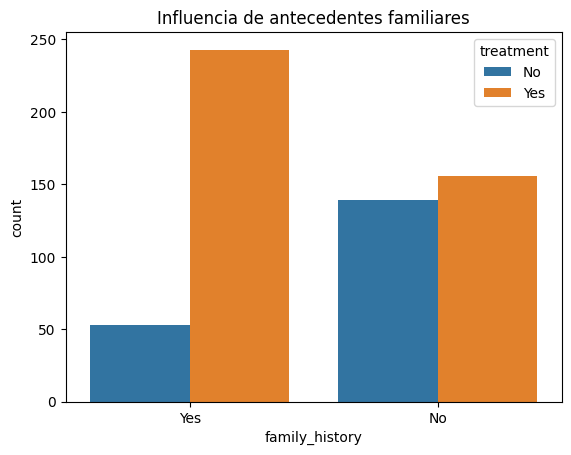

In [29]:

# Tratamiento por género
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title("Tratamiento de salud mental por género")
plt.xticks(rotation=45)
plt.show()

# Antecedentes familiares y tratamiento
sns.countplot(data=df, x='family_history', hue='treatment')
plt.title("Influencia de antecedentes familiares")
plt.show()


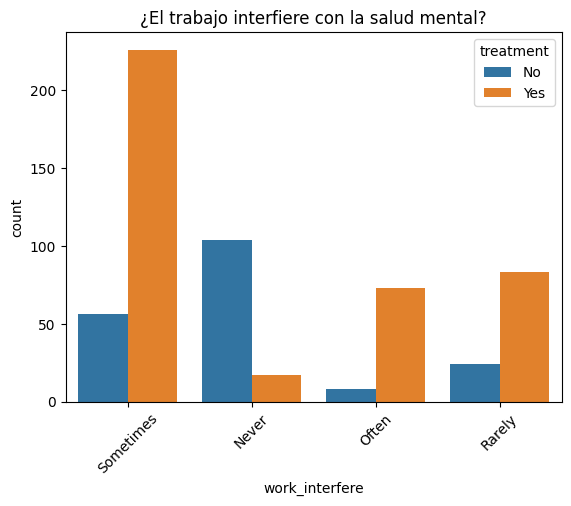

In [30]:

# Impacto del entorno laboral
sns.countplot(data=df, x='work_interfere', hue='treatment')
plt.title("¿El trabajo interfiere con la salud mental?")
plt.xticks(rotation=45)
plt.show()

## 🤖 Modelado y predicción

              precision    recall  f1-score   support

       False       0.83      0.33      0.48        45
        True       0.70      0.96      0.81        74

    accuracy                           0.72       119
   macro avg       0.77      0.65      0.64       119
weighted avg       0.75      0.72      0.68       119



<Axes: >

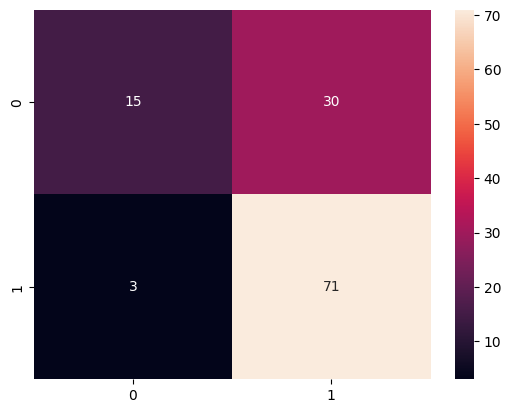

In [32]:

# Separar variables predictoras y objetivo
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop("treatment_Yes", axis=1)
y = df_encoded["treatment_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
